In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

data= pd.read_csv('body.csv')
data.head()

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
0,1.0,30,22,18,20,18,14,22,22,25,25,22,52
1,1.0,28,19,22,17,18,21,25,28,23,25,20,56
2,2.0,27,21,18,16,14,10,15,21,18,14,18,53
3,1.0,29,20,20,18,11,19,14,24,21,20,21,45
4,2.0,28,16,14,18,13,11,30,25,22,32,13,47


In [3]:
print(data.isnull().sum())

Gender               1
Age                  0
HeadCircumference    0
ShoulderWidth        0
ChestWidth           0
Belly                0
Waist                0
Hips                 0
ArmLength            0
ShoulderToWaist      0
WaistToKnee          0
LegLength            0
TotalHeight          0
dtype: int64


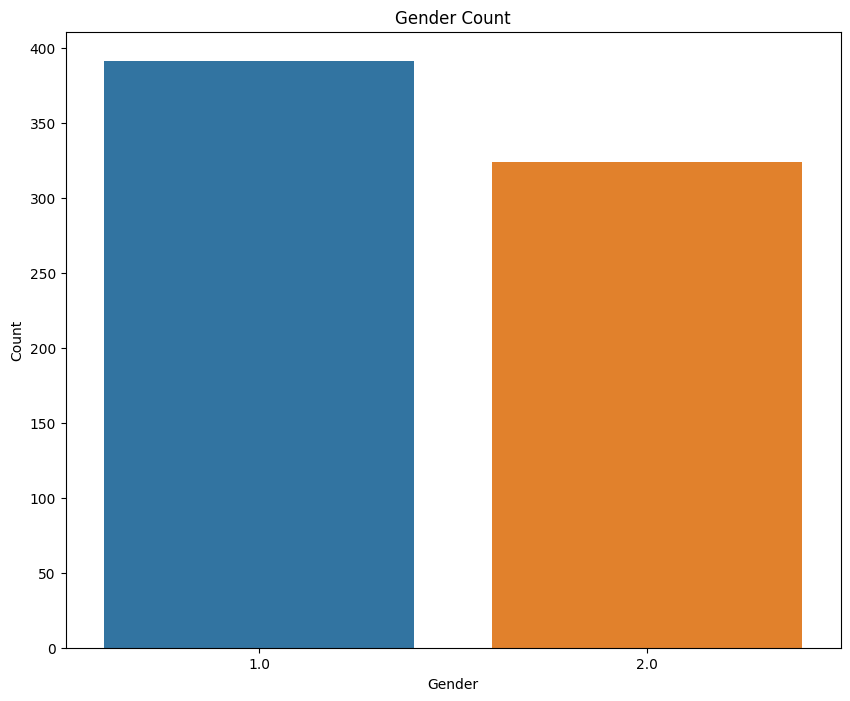

In [4]:
import seaborn as sns

plt.figure(figsize= (10,8))
sns.countplot(data= data , x='Gender')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


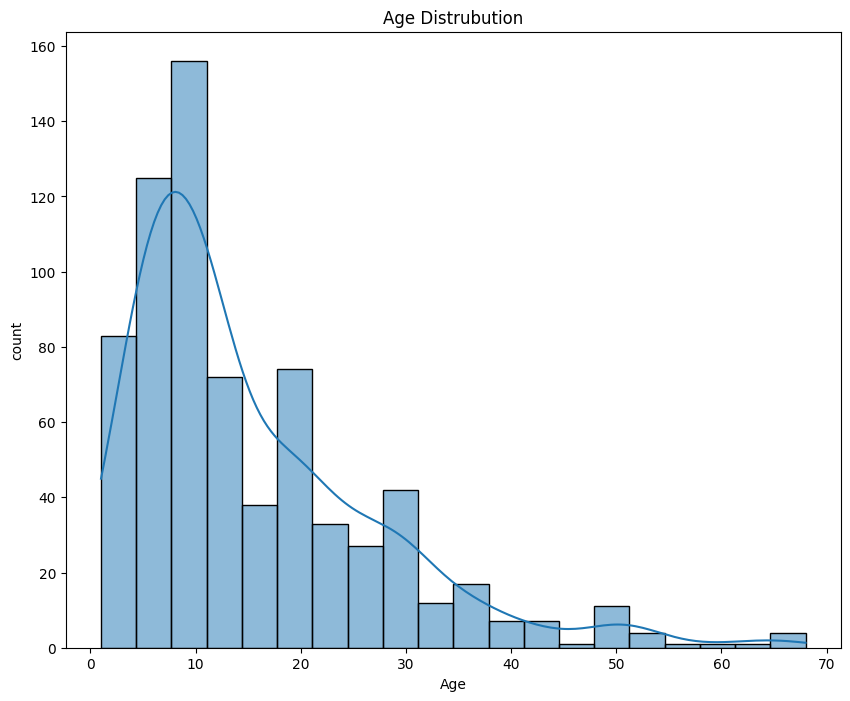

In [5]:
plt.figure(figsize=(10,8))
sns.histplot(data['Age'],bins=20, kde = True)
plt.title('Age Distrubution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


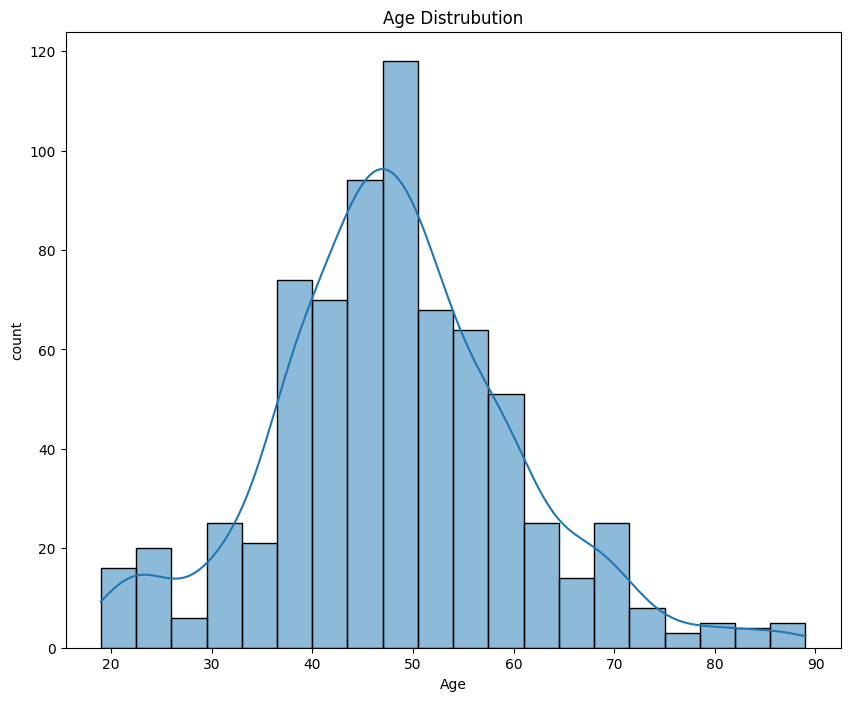

In [6]:
plt.figure(figsize=(10,8))
sns.histplot(data['TotalHeight'],bins=20, kde = True)
plt.title('Age Distrubution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

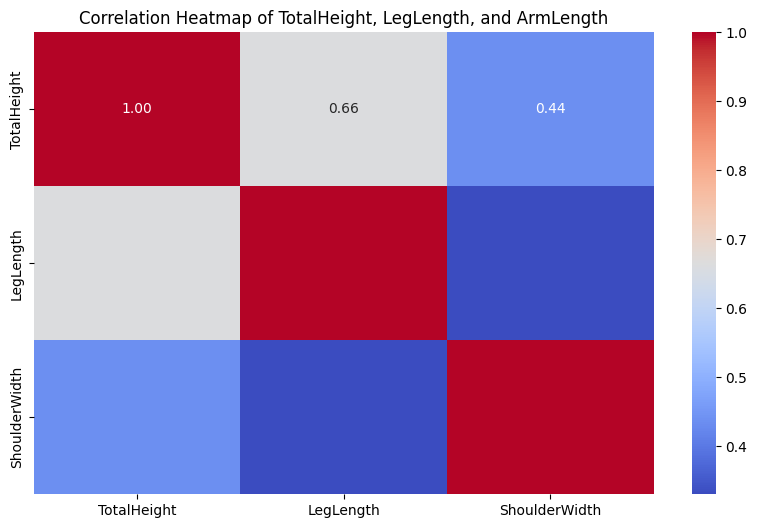

In [7]:
columns = ['TotalHeight', 'LegLength','ShoulderWidth']
corr_matrix = data[columns].corr()

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of TotalHeight, LegLength, and ArmLength')
plt.show()

In [10]:
#Normalite Test

from scipy.stats  import shapiro, normaltest, anderson

stat, p_value  =  shapiro(data['ShoulderWidth'])
print(f"Shapiro Test(Total Height): stat{stat}, p-value: {p_value}")

stat,p_value= normaltest(data['TotalHeight'])
print(f"D'Agostino's k^2 Test(): stat: {stat}, p-value:{p_value}")


# Anderson-Darling Testt
print("\nAnderson-Darling Testt:")
for col in columns:
    anderson_test = stats.anderson(data[col].dropna(), dist='norm')
    print(f"{col} - Test İstatistiği: {anderson_test.statistic}, Kritik Değerler: {anderson_test.critical_values}")

Shapiro Test(Total Height): stat0.7685548663139343, p-value: 1.5170438264876059e-30
D'Agostino's k^2 Test(): stat: 18.058503271126597, p-value:0.00011985215270757474

Anderson-Darling Testi:
TotalHeight - Test İstatistiği: 3.39015880038221, Kritik Değerler: [0.573 0.652 0.783 0.913 1.086]
LegLength - Test İstatistiği: 7.607246081415269, Kritik Değerler: [0.573 0.652 0.783 0.913 1.086]
ShoulderWidth - Test İstatistiği: 9.62292500328681, Kritik Değerler: [0.573 0.652 0.783 0.913 1.086]


In [27]:
#Non-Parametric
import scipy.stats as stats
group1 = data[data['Gender'] == 1]['TotalHeight']    
group2 = data[data['Gender'] == 2]['TotalHeight'] 

u_stat, p_value = stats.mannwhitneyu(group1, group2)
print(f"Mann-Whitney U Test(Gender-TotalHeight): p-value: {p_value}")

#Kruskal
data['Age_group']= pd.cut(data['Age'], bins =[0,20,40,60,80,100], labels=['0-20','21-40','41-60','61-80','81-100'])

gp1= data[data['Age_group'] == '0-20']['TotalHeight']   
gp2= data[data['Age_group'] == '21-40']['TotalHeight']                                                                          
gp3= data[data['Age_group'] == '41-60']['TotalHeight']

h_stat, p_value = stats.kruskal(gp1, gp2, gp3)
print(f"Kruskal-Wallis Test(Age-TotalHeight):p-value: {p_value}")



# Friedman Test
stat, p_value = stats.friedmanchisquare(data['TotalHeight'].dropna(), data['ShoulderWidth'].dropna(), data['LegLength'].dropna())
print(f"Friedman Test(TotalLength, ShoulderWidth, LegLength) - p-değeri: {p_value}")


Mann-Whitney U Test(Gender-TotalHeight): p-value: 0.08582454421627457
Kruskal-Wallis Test(Age-TotalHeight):p-value: 5.51437170982096e-19
Friedman Test(TotalLength, ShoulderWidth, LegLength) - p-değeri: 8.983261073009844e-296


In [36]:
data.head()

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight,Age_group
0,1.0,30,22,18,20,18,14,22,22,25,25,22,52,21-40
1,1.0,28,19,22,17,18,21,25,28,23,25,20,56,21-40
2,2.0,27,21,18,16,14,10,15,21,18,14,18,53,21-40
3,1.0,29,20,20,18,11,19,14,24,21,20,21,45,21-40
4,2.0,28,16,14,18,13,11,30,25,22,32,13,47,21-40


In [47]:
#Correlasion
#Pearsonr
corr, p_value= stats.pearsonr(data['LegLength'],data['TotalHeight'])
print(f"Pearson Korelasyon Test(Leg and height relaiton): {corr:.4f}, p-value= {p_value} ")


#Spearman

rho,p_value =stats.spearmanr(data['ShoulderWidth'], data['TotalHeight'])
print(f"Spearmanr Test(Shoulder-Height): {rho:.3f}, p-value:{p_value}")

#Kendall Tau
tau, p_value = stats.kendalltau(data['ShoulderWidth'],data['TotalHeight'])
print(f"Kendall Tau Test(Shoulder Width- TotalHeight): {tau:.3f}, p-value:{p_value}")


Pearson Korelasyon Test(Leg and height relaiton): 0.6622, p-value= 1.490808958673992e-91 
Spearmanr Test: 0.595, p-value:6.518578295524883e-70
Kendall Tau Test: 0.458, p-value:2.385513887294407e-68
